Terry Hood Jupyter Notebook 

## Multi-Layer Perceptron (MLP) model

Step 1: Install Required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

Step 2: Prepare Your Data

In [2]:
# Load the dataset
clean_df = pd.read_csv('clean_df.csv')
clean_df.head(5)

,EDUC,MARSTAT,SERVICES,LOS,PSOURCE,NOPRIOR,ARRESTS,EMPLOY,METHUSE,PSYPROB,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,3,1,7,7,6,1,0,2,2,1,...,0,0,0,0,0,0,9,4,0,1
1,3,4,7,8,1,1,0,2,2,1,...,0,0,0,0,0,1,9,4,0,3
2,3,4,7,7,3,1,0,1,2,2,...,0,0,0,0,0,0,9,4,0,2
3,5,1,7,4,7,0,0,1,2,2,...,0,0,0,0,0,0,9,4,0,1
4,3,4,7,3,7,1,1,4,2,1,...,0,0,0,0,0,0,9,4,0,3


In [3]:
# Set the features variable 
X = clean_df.drop(columns='REASON')
# Set the target variable
y = clean_df["REASON"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 3: Define Define and Train the MLP Model

In [5]:
from sklearn.neural_network import MLPClassifier

# Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)


MLPClassifier(max_iter=500, random_state=42)

Predict and Evaluate the MLP Model

In [10]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = mlp.predict(X_test)
print(f'Accuracy: {np.mean(y_pred == y_test):.2f}')
print(classification_report(y_test, y_pred))

# Save the model
import joblib
joblib.dump(mlp, 'mlp_model_vsc.pkl')


Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.77      0.68      0.72    708990
           1       0.83      0.88      0.85   1223451

    accuracy                           0.81   1932441
   macro avg       0.80      0.78      0.79   1932441
weighted avg       0.81      0.81      0.81   1932441



['mlp_model_vsc.pkl']

In [11]:
# Check to see if data is balanced
clean_df["REASON"].value_counts()

1    4078702
0    2362767
Name: REASON, dtype: int64

Predictive Output of the MLP Model

In [12]:
# # Load the model
# mlp = joblib.load('mlp_model.pkl')

# # Make predictions on new data
# # new_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example new data
# new_data_scaled = np.random.rand(1, 68)
# new_data_scaled = scaler.transform(new_data_scaled)
# prediction = mlp.predict(new_data_scaled)
# print(f'Predicted class: {prediction[0]}')

# import joblib
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Load the model and scaler
# mlp = joblib.load('mlp_model.pkl')
# scaler = joblib.load('mlp_model.pkl')

# # Get Column names
# columns = clean_df.columns
# print(columns)

# # # Example feature names (replace these with actual feature names used during training)
# feature_names = [f'feature_{i}' for i in range(1, 69)]

# # Your actual new data with 68 features (replace with actual values)
# new_data = np.random.rand(1, 68)  # This should be replaced with your actual new data

# # Convert the new data to a DataFrame with the same feature names
# new_data_df = pd.DataFrame(new_data, columns=feature_names)

# # Scale the new data
# new_data_scaled = scaler.transform(new_data_df)

# # Make predictions
# prediction = mlp.predict(new_data_scaled)
# print(f'Predicted class: {prediction[0]}')


Index(['EDUC', 'MARSTAT', 'SERVICES', 'LOS', 'PSOURCE', 'NOPRIOR', 'ARRESTS',
       'EMPLOY', 'METHUSE', 'PSYPROB', 'PREG', 'GENDER', 'VET', 'LIVARAG',
       'DAYWAIT', 'SERVICES_D', 'REASON', 'EMPLOY_D', 'LIVARAG_D', 'ARRESTS_D',
       'DSMCRIT', 'AGE', 'RACE', 'ETHNIC', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3',
       'SUB1_D', 'SUB2_D', 'SUB3_D', 'ROUTE1', 'ROUTE2', 'ROUTE3', 'FREQ1',
       'FREQ2', 'FREQ3', 'FREQ1_D', 'FREQ2_D', 'FREQ3_D', 'FRSTUSE1',
       'FRSTUSE2', 'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP',
       'FREQ_ATND_SELF_HELP_D', 'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG',
       'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG',
       'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG',
       'OTCFLG', 'OTHERFLG', 'DIVISION', 'REGION', 'IDU', 'ALCDRUG'],
      dtype='object')


TensorFlow/Keras:

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set input nodes to the number of features
input_nodes = len(X.columns)

# Define the MLP model
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(50, activation='relu'),
    Dense(3, activation='softmax')  # Adjust the number of neurons to match the number of classes in your dataset
])

# Check the structure of the Sequential model
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Save the model
model.save('mlp_model.keras')

c:\Users\tdhdp\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │         6,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,103 (47.28 KB)

 Trainable params: 12,103 (47.28 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 167s 1ms/step - accuracy: 0.7800 - loss: 0.4443 - val_accuracy: 0.8032 - val_loss: 0.4045
Epoch 2/10
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 154s 1ms/step - accuracy: 0.8057 - loss: 0.4010 - val_accuracy: 0.8079 - val_loss: 0.3987
Epoch 3/10
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 162s 1ms/step - accuracy: 0.8094 - loss: 0.3949 - val_accuracy: 0.8094 - val_loss: 0.3949
Epoch 4/10
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 156s 1ms/step - accuracy: 0.8119 - loss: 0.3918 - val_accuracy: 0.8113 - val_loss: 0.3921
Epoch 5/10
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 158s 1ms/step - accuracy: 0.8130 - loss: 0.3902 - val_accuracy: 0.8115 - val_loss: 0.3927
Epoch 6/10
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 151s 1ms/step - accuracy: 0.8130 - loss: 0.3892 - val_accuracy: 0.8123 - val_loss: 0.3913
Epoch 7/10
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 160s 1ms/step - accuracy: 0.8140 - loss: 0.3889 - val_accuracy: 0.8130 - val_loss: 0.3898
Epoch 8/10
112726/112726 ━━━━━━━━━━━━━━━━━━━━ 15

   accuracy      loss  val_accuracy  val_loss
0  0.793142  0.421548      0.803234  0.404483
1  0.806798  0.399444      0.807931  0.398664
2  0.809866  0.394463      0.809427  0.394858
3  0.811770  0.391848      0.811342  0.392066
4  0.812810  0.390394      0.811474  0.392694


<Axes: >

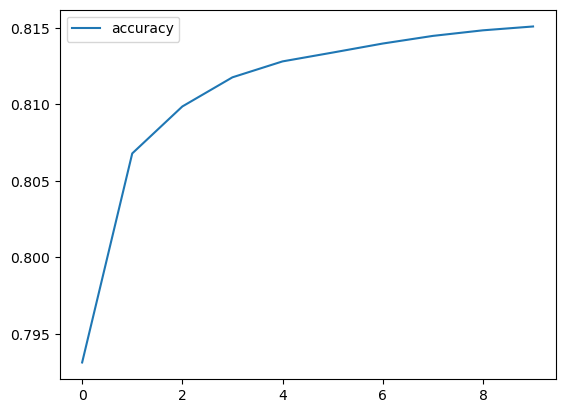

In [13]:
# Access the history dictionary
history_dict = history.history

# Create a DataFrame from the history dictionary
history_df = pd.DataFrame(history_dict)

# Display the first few rows of the DataFrame
print(history_df.head())

# Assuming "accuracy" is a key in your `cleaned_df` DataFrame, plot the accuracy
history_df.plot(y="accuracy")

<Axes: >

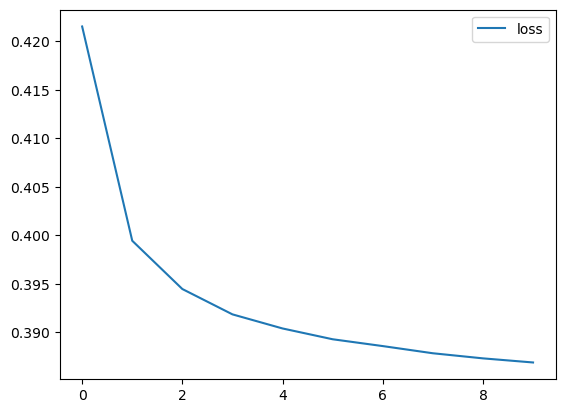

In [14]:
history_df.plot(y="loss")

Predict and Evaluate the TensorFlow/Keras Model

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes):.2f}')

60389/60389 ━━━━━━━━━━━━━━━━━━━━ 44s 735us/step
              precision    recall  f1-score   support

           0       0.77      0.71      0.74    708990
           1       0.84      0.87      0.86   1223451

    accuracy                           0.81   1932441
   macro avg       0.80      0.79      0.80   1932441
weighted avg       0.81      0.81      0.81   1932441

Accuracy: 0.81


Predictive Output of the TensorFlow/Keras Model

In [ ]:
# Load the model
# model = tf.keras.models.load_model('mlp_model.keras')

# # Make predictions on new data
# new_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example new data
# # new_data_scaled = scaler.transform(new_data)
# prediction = model.predict(new_data)
# predicted_class = np.argmax(prediction, axis=1)
# print(f'Predicted class: {predicted_class[0]}')


This code covers the entire process from data preparation to making predictions on new data for both Scikit-learn and TensorFlow/Keras implementations of an MLP model. Adjust the example new data (new_data) to suit your actual use case.

<!-- Step 4: Evaluate and Save the Model
After training, evaluate the model’s performance and save it if necessary. -->